In [ ]:
import pandas as pd
import re
df = pd.read_csv('andra_restaurants_data')
df

,Links,Names,Ratings,Price_For_Two,Cuisine,Images,Opening_And_Closing time,Location,Signature_Dishes,Special_Features,Safety_Measures,Address,More_Info,latitude,longitude
0,https://www.zomato.com/visakhapatnam/vista-the...,Vista - The Park,4.2,"₹2,000 for two","American, North Indian, Thai, Continental, Des...",NaN,6:30am – 12midnight (Today),"The Park, Lawsons Bay, Vizag",Not available,"View, Great Place, Ambiance, Menu, Price, Quan...",Daily Temp. Checks,"Hotel GreenPark, Waltair Main Road, Waltair Up...","Home Delivery, Buffet, Family Friendly, Table ...",16.422382,79.208653
1,https://www.zomato.com/visakhapatnam/the-squar...,The Square - Hotel Novotel,4.1,"₹3,000 for two","Continental, North Indian",NaN,6:30am – 1am (Today),"Hotel Novotel, Maharani Peta, Vizag",Not available,"Cooking Stations, Sophisticated, Worth the Pri...",Daily Temp. Checks,"15-3-22 & 222, Block 4, Nowroji Road, Ramakris...","Breakfast, Home Delivery, Takeaway Available, ...",37.388435,-1.940816
2,https://www.zomato.com/visakhapatnam/abs-absol...,AB's - Absolute Barbecues,4.4,"₹1,650 for two","Biryani, BBQ, Kebab, North Indian, Desserts",NaN,"11:30am – 4:30pm, 6:30pm – 11:30pm (Today)","Dwaraka Nagar, Vizag",Not available,"Excellent Food Service, Complimentary Drinks, ...",Daily Temp. Checks,"10-28-3, Waltair Main Road, Waltair Uplands, V...","Home Delivery, Takeaway Available, Valet Parki...",17.720888,83.312397
3,https://www.zomato.com/visakhapatnam/kai-welco...,KAI - WelcomHotel Grand Bay,4.4,"₹3,500 for two","Asian, Thai, Japanese, Seafood, Sushi, Chinese...",NaN,"12:30pm – 2:45pm, 7pm – 11:30pm (Today)","Welcomhotel By ITC Hotels, Devee Grand Bay, Vizag",Not available,"Outstanding Service, Warm Welcome, Authentic F...",Daily Temp. Checks,"9-14-4, VIP Road, CBM Compound, Sector 4, Siri...","Breakfast, Takeaway Available, Brunch, Indoor ...",17.727816,83.305019
4,https://www.zomato.com/visakhapatnam/barbeque-...,Barbeque Nation,4.3,"₹1,600 for two","North Indian, BBQ, Biryani, Kebab, Continental...",NaN,"11:30am – 4:30pm, 6:30pm – 11:30pm (Today)","Siripuram, Vizag",Not available,"Cute Packaging, Food Presentation, Worth the M...",Daily Temp. Checks,"9-30-1, Plot 25, 1st Floor, Near PMJ Jewellers...","Takeaway Available, Full Bar Available, Table ...",17.728801,83.316116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,https://www.zomato.com/vijayawada/verandah-cof...,Verandah Coffee Roasters And Café,4.9,₹500 for two,"Cafe, Continental, Italian, Fast Food, Bakery,...",NaN,10am – 10pm (Today),"Auto Nagar, Vijayawada",Not available,Not available,Not available,Not available,"Breakfast, Home Delivery, Takeaway Available, ...",40.700188,19.964893
4701,https://www.zomato.com/vijayawada/haldirams-re...,Haldiram’s Restaurant,4.8,₹200 for two,Mithai,NaN,"12midnight – 2am, 8am – 12midnight (Today)","Gandhi Nagar, Vijayawada",Not available,Not available,Not available,Not available,"Home Delivery, Takeaway Available, Indoor Seating",40.700188,19.964893
4702,https://www.zomato.com/vijayawada/kfc-1-labbip...,KFC,4.2,₹450 for two,"Burger, Fast Food, Rolls",NaN,"12midnight – 1am, 10am – 12midnight (Today)","Labbipet, Vijayawada",Not available,Not available,Not available,Not available,"Home Delivery, Takeaway Available, Indoor Seating",40.700188,19.964893
4703,https://www.zomato.com/vijayawada/taco-bell-la...,Taco Bell,3.8,₹550 for two,"Mexican, Fast Food, Wraps, Beverages",NaN,11am – 11pm (Today),"PVP Square Mall, Labbipet, Vijayawada",Not available,Not available,Not available,Not available,"Beer, Nightlife, Indoor Seating, Drinking Age ...",40.700188,19.964893


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Links                     4705 non-null   object 
 1   Names                     4705 non-null   object 
 2   Ratings                   4705 non-null   object 
 3   Price_For_Two             4705 non-null   object 
 4   Cuisine                   4705 non-null   object 
 5   Images                    55 non-null     object 
 6   Opening_And_Closing time  4705 non-null   object 
 7   Location                  4705 non-null   object 
 8   Signature_Dishes          4705 non-null   object 
 9   Special_Features          3164 non-null   object 
 10  Safety_Measures           4705 non-null   object 
 11  Address                   4705 non-null   object 
 12  More_Info                 4281 non-null   object 
 13  latitude                  4128 non-null   float64
 14  longitud

In [13]:
df.isnull().sum()

Links                          0
Names                          0
Ratings                        0
Price_For_Two                  0
Cuisine                        0
Images                      4650
Opening_And_Closing time       0
Location                       0
Signature_Dishes               0
Special_Features            1541
Safety_Measures                0
Address                        0
More_Info                    424
latitude                     577
longitude                    577
dtype: int64

In [14]:
def clean_price(value):
    match = re.search(r'\d+', str(value))
    if match:
        return int(match.group(0))
    return None 

In [15]:
df['Price_For_Two'] = df['Price_For_Two'].apply(clean_price)


In [16]:
threshold = 0.9
null_percentage = df.isnull().mean()
df = df.drop(columns = null_percentage[null_percentage > threshold].index)

In [17]:
null_percentage_per_row = df.isnull().mean(axis = 1)
df = df[null_percentage_per_row <= threshold]

In [18]:
df["Signature_Dishes"] = df["Signature_Dishes"].fillna(" ")
df["Signature_Dishes"] = df["Signature_Dishes"].fillna(" ")
df["Special_Features"] = df["Special_Features"].fillna(" ")
df["More_Info"] = df["More_Info"].fillna(" ")

In [19]:
df.isnull().sum()

Links                         0
Names                         0
Ratings                       0
Price_For_Two                 0
Cuisine                       0
Opening_And_Closing time      0
Location                      0
Signature_Dishes              0
Special_Features              0
Safety_Measures               0
Address                       0
More_Info                     0
latitude                    577
longitude                   577
dtype: int64

In [20]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 0


In [21]:
duplicates = df[df.duplicated(subset=['Address'], keep=False)]
print(duplicates)

                                                  Links  \
0     https://www.zomato.com/visakhapatnam/vista-the...   
1     https://www.zomato.com/visakhapatnam/the-squar...   
2     https://www.zomato.com/visakhapatnam/abs-absol...   
3     https://www.zomato.com/visakhapatnam/kai-welco...   
4     https://www.zomato.com/visakhapatnam/barbeque-...   
...                                                 ...   
4700  https://www.zomato.com/vijayawada/verandah-cof...   
4701  https://www.zomato.com/vijayawada/haldirams-re...   
4702  https://www.zomato.com/vijayawada/kfc-1-labbip...   
4703  https://www.zomato.com/vijayawada/taco-bell-la...   
4704  https://www.zomato.com/vijayawada/vault-brewer...   

                                  Names Ratings  Price_For_Two  \
0                      Vista - The Park     4.2              2   
1            The Square - Hotel Novotel     4.1              3   
2             AB's - Absolute Barbecues     4.4              1   
3           KAI - WelcomHot

In [22]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 0


In [23]:
df = df.drop_duplicates()

In [24]:
len(df)

4705

In [25]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

if duplicates.any():
    print("Duplicate rows:")
    print(df[duplicates])

Number of duplicate rows: 0


In [26]:
df["Ratings"] = df["Ratings"].astype(str).str.replace("star-fill", "", regex=False)

df["Ratings"] = pd.to_numeric(df["Ratings"], errors='coerce')

df.to_csv("modified_file.csv", index=False)

In [27]:
df.tail()

,Links,Names,Ratings,Price_For_Two,Cuisine,Opening_And_Closing time,Location,Signature_Dishes,Special_Features,Safety_Measures,Address,More_Info,latitude,longitude
4700,https://www.zomato.com/vijayawada/verandah-cof...,Verandah Coffee Roasters And Café,4.9,500,"Cafe, Continental, Italian, Fast Food, Bakery,...",10am – 10pm (Today),"Auto Nagar, Vijayawada",Not available,Not available,Not available,Not available,"Breakfast, Home Delivery, Takeaway Available, ...",40.700188,19.964893
4701,https://www.zomato.com/vijayawada/haldirams-re...,Haldiram’s Restaurant,4.8,200,Mithai,"12midnight – 2am, 8am – 12midnight (Today)","Gandhi Nagar, Vijayawada",Not available,Not available,Not available,Not available,"Home Delivery, Takeaway Available, Indoor Seating",40.700188,19.964893
4702,https://www.zomato.com/vijayawada/kfc-1-labbip...,KFC,4.2,450,"Burger, Fast Food, Rolls","12midnight – 1am, 10am – 12midnight (Today)","Labbipet, Vijayawada",Not available,Not available,Not available,Not available,"Home Delivery, Takeaway Available, Indoor Seating",40.700188,19.964893
4703,https://www.zomato.com/vijayawada/taco-bell-la...,Taco Bell,3.8,550,"Mexican, Fast Food, Wraps, Beverages",11am – 11pm (Today),"PVP Square Mall, Labbipet, Vijayawada",Not available,Not available,Not available,Not available,"Beer, Nightlife, Indoor Seating, Drinking Age ...",40.700188,19.964893
4704,https://www.zomato.com/vijayawada/vault-brewer...,Vault Brewery,4.9,1,"North Indian, Seafood, Mexican, Chinese, Salad",11am – 12midnight (Today),"Gurunanak Colony, Vijayawada",Not available,Not available,Not available,Not available,"Breakfast, Takeaway Available, Full Bar Availa...",40.700188,19.964893


In [28]:
def extract_timings(timing):
    try:
        parts = timing.split(',')
        open_times = []
        close_times = []
        for part in parts:
            if '–' in part:
                times = part.split('–')
                open_times.append(times[0].strip())  
                close_times.append(times[1].split('(')[0].strip())
        if not open_times or not close_times:
            return None, None
        return open_times[0], close_times[-1]

    except Exception as e:
        print(f"Error processing timing: {timing}, Error: {e}")
        return None, None

In [29]:
df['Opening_Times'], df['Closing_Times'] = zip(*df['Opening_And_Closing time'].apply(extract_timings))

In [30]:
df.head()

,Links,Names,Ratings,Price_For_Two,Cuisine,Opening_And_Closing time,Location,Signature_Dishes,Special_Features,Safety_Measures,Address,More_Info,latitude,longitude,Opening_Times,Closing_Times
0,https://www.zomato.com/visakhapatnam/vista-the...,Vista - The Park,4.2,2,"American, North Indian, Thai, Continental, Des...",6:30am – 12midnight (Today),"The Park, Lawsons Bay, Vizag",Not available,"View, Great Place, Ambiance, Menu, Price, Quan...",Daily Temp. Checks,"Hotel GreenPark, Waltair Main Road, Waltair Up...","Home Delivery, Buffet, Family Friendly, Table ...",16.422382,79.208653,6:30am,12midnight
1,https://www.zomato.com/visakhapatnam/the-squar...,The Square - Hotel Novotel,4.1,3,"Continental, North Indian",6:30am – 1am (Today),"Hotel Novotel, Maharani Peta, Vizag",Not available,"Cooking Stations, Sophisticated, Worth the Pri...",Daily Temp. Checks,"15-3-22 & 222, Block 4, Nowroji Road, Ramakris...","Breakfast, Home Delivery, Takeaway Available, ...",37.388435,-1.940816,6:30am,1am
2,https://www.zomato.com/visakhapatnam/abs-absol...,AB's - Absolute Barbecues,4.4,1,"Biryani, BBQ, Kebab, North Indian, Desserts","11:30am – 4:30pm, 6:30pm – 11:30pm (Today)","Dwaraka Nagar, Vizag",Not available,"Excellent Food Service, Complimentary Drinks, ...",Daily Temp. Checks,"10-28-3, Waltair Main Road, Waltair Uplands, V...","Home Delivery, Takeaway Available, Valet Parki...",17.720888,83.312397,11:30am,11:30pm
3,https://www.zomato.com/visakhapatnam/kai-welco...,KAI - WelcomHotel Grand Bay,4.4,3,"Asian, Thai, Japanese, Seafood, Sushi, Chinese...","12:30pm – 2:45pm, 7pm – 11:30pm (Today)","Welcomhotel By ITC Hotels, Devee Grand Bay, Vizag",Not available,"Outstanding Service, Warm Welcome, Authentic F...",Daily Temp. Checks,"9-14-4, VIP Road, CBM Compound, Sector 4, Siri...","Breakfast, Takeaway Available, Brunch, Indoor ...",17.727816,83.305019,12:30pm,11:30pm
4,https://www.zomato.com/visakhapatnam/barbeque-...,Barbeque Nation,4.3,1,"North Indian, BBQ, Biryani, Kebab, Continental...","11:30am – 4:30pm, 6:30pm – 11:30pm (Today)","Siripuram, Vizag",Not available,"Cute Packaging, Food Presentation, Worth the M...",Daily Temp. Checks,"9-30-1, Plot 25, 1st Floor, Near PMJ Jewellers...","Takeaway Available, Full Bar Available, Table ...",17.728801,83.316116,11:30am,11:30pm


In [ ]:
df=df.drop(columns=["Opening_And_Closing time"])
df.to_csv('preprocessed_data', index=False)

In [32]:
df

,Links,Names,Ratings,Price_For_Two,Cuisine,Location,Signature_Dishes,Special_Features,Safety_Measures,Address,More_Info,latitude,longitude,Opening_Times,Closing_Times
0,https://www.zomato.com/visakhapatnam/vista-the...,Vista - The Park,4.2,2,"American, North Indian, Thai, Continental, Des...","The Park, Lawsons Bay, Vizag",Not available,"View, Great Place, Ambiance, Menu, Price, Quan...",Daily Temp. Checks,"Hotel GreenPark, Waltair Main Road, Waltair Up...","Home Delivery, Buffet, Family Friendly, Table ...",16.422382,79.208653,6:30am,12midnight
1,https://www.zomato.com/visakhapatnam/the-squar...,The Square - Hotel Novotel,4.1,3,"Continental, North Indian","Hotel Novotel, Maharani Peta, Vizag",Not available,"Cooking Stations, Sophisticated, Worth the Pri...",Daily Temp. Checks,"15-3-22 & 222, Block 4, Nowroji Road, Ramakris...","Breakfast, Home Delivery, Takeaway Available, ...",37.388435,-1.940816,6:30am,1am
2,https://www.zomato.com/visakhapatnam/abs-absol...,AB's - Absolute Barbecues,4.4,1,"Biryani, BBQ, Kebab, North Indian, Desserts","Dwaraka Nagar, Vizag",Not available,"Excellent Food Service, Complimentary Drinks, ...",Daily Temp. Checks,"10-28-3, Waltair Main Road, Waltair Uplands, V...","Home Delivery, Takeaway Available, Valet Parki...",17.720888,83.312397,11:30am,11:30pm
3,https://www.zomato.com/visakhapatnam/kai-welco...,KAI - WelcomHotel Grand Bay,4.4,3,"Asian, Thai, Japanese, Seafood, Sushi, Chinese...","Welcomhotel By ITC Hotels, Devee Grand Bay, Vizag",Not available,"Outstanding Service, Warm Welcome, Authentic F...",Daily Temp. Checks,"9-14-4, VIP Road, CBM Compound, Sector 4, Siri...","Breakfast, Takeaway Available, Brunch, Indoor ...",17.727816,83.305019,12:30pm,11:30pm
4,https://www.zomato.com/visakhapatnam/barbeque-...,Barbeque Nation,4.3,1,"North Indian, BBQ, Biryani, Kebab, Continental...","Siripuram, Vizag",Not available,"Cute Packaging, Food Presentation, Worth the M...",Daily Temp. Checks,"9-30-1, Plot 25, 1st Floor, Near PMJ Jewellers...","Takeaway Available, Full Bar Available, Table ...",17.728801,83.316116,11:30am,11:30pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,https://www.zomato.com/vijayawada/verandah-cof...,Verandah Coffee Roasters And Café,4.9,500,"Cafe, Continental, Italian, Fast Food, Bakery,...","Auto Nagar, Vijayawada",Not available,Not available,Not available,Not available,"Breakfast, Home Delivery, Takeaway Available, ...",40.700188,19.964893,10am,10pm
4701,https://www.zomato.com/vijayawada/haldirams-re...,Haldiram’s Restaurant,4.8,200,Mithai,"Gandhi Nagar, Vijayawada",Not available,Not available,Not available,Not available,"Home Delivery, Takeaway Available, Indoor Seating",40.700188,19.964893,12midnight,12midnight
4702,https://www.zomato.com/vijayawada/kfc-1-labbip...,KFC,4.2,450,"Burger, Fast Food, Rolls","Labbipet, Vijayawada",Not available,Not available,Not available,Not available,"Home Delivery, Takeaway Available, Indoor Seating",40.700188,19.964893,12midnight,12midnight
4703,https://www.zomato.com/vijayawada/taco-bell-la...,Taco Bell,3.8,550,"Mexican, Fast Food, Wraps, Beverages","PVP Square Mall, Labbipet, Vijayawada",Not available,Not available,Not available,Not available,"Beer, Nightlife, Indoor Seating, Drinking Age ...",40.700188,19.964893,11am,11pm


C:\Users\Nithin\AppData\Local\Temp\ipykernel_14840\3938950615.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(most_common_cuisines.values()), y=list(most_common_cuisines.keys()), palette='viridis')


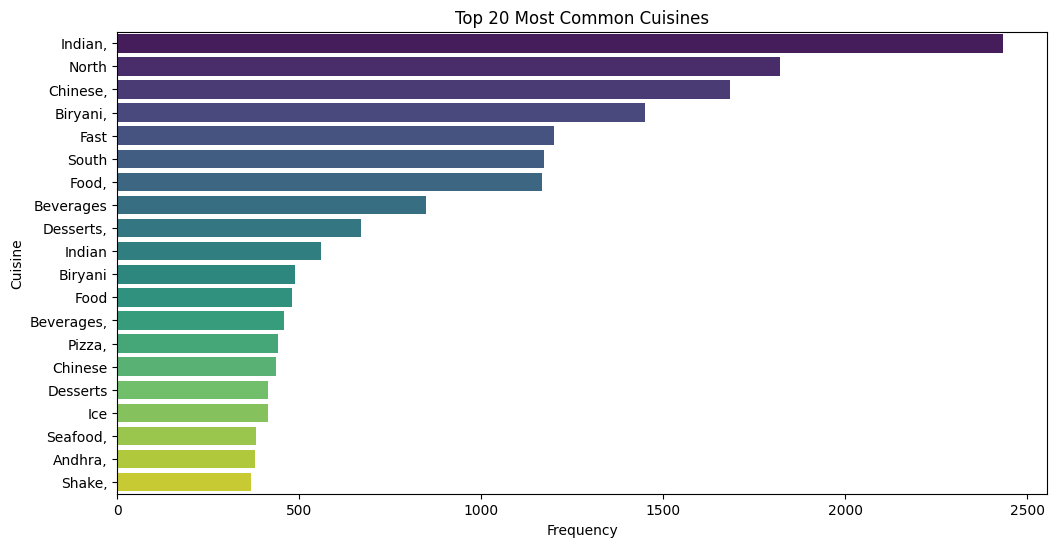

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
cuisine_series = df['Cuisine'].dropna()
cuisine_list = " ".join(cuisine_series).split()
cuisine_counts = Counter(cuisine_list)
most_common_cuisines = dict(cuisine_counts.most_common(20))  
plt.figure(figsize=(12, 6))
sns.barplot(x=list(most_common_cuisines.values()), y=list(most_common_cuisines.keys()), palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.title('Top 20 Most Common Cuisines')
plt.show()


C:\Users\Nithin\AppData\Local\Temp\ipykernel_14840\1767871086.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


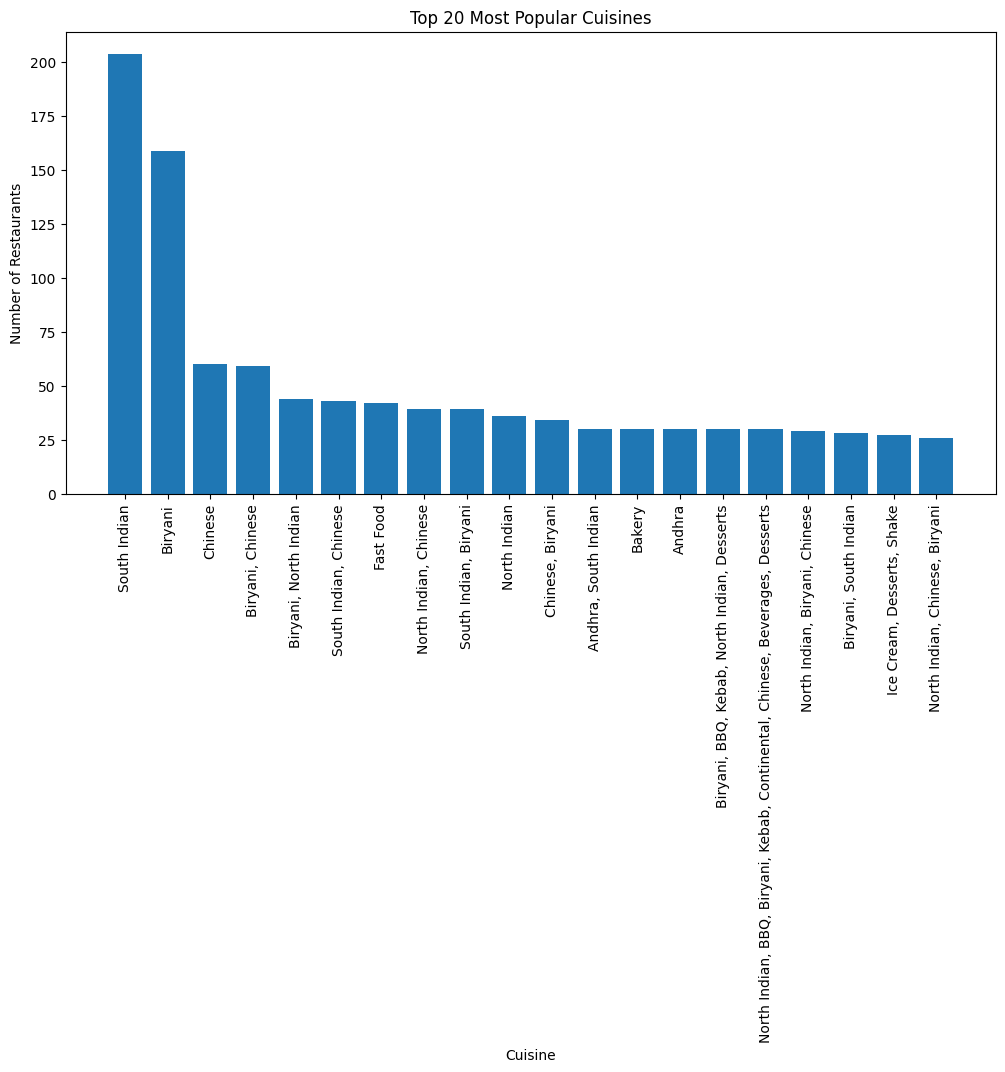

In [34]:
cuisine_counts = df['Cuisine'].value_counts().head(20)

plt.figure(figsize=(12, 6))
plt.bar(cuisine_counts.index, cuisine_counts.values)
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.title('Top 20 Most Popular Cuisines')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

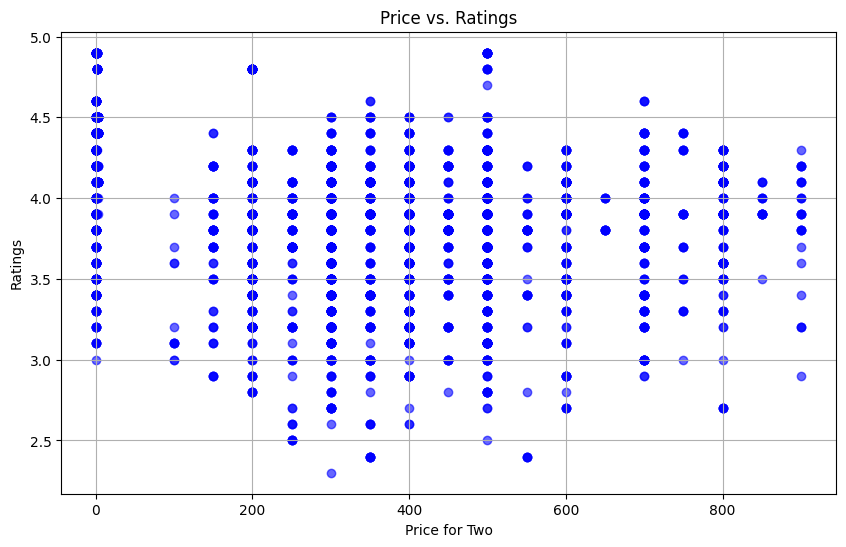

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Price_For_Two'], df['Ratings'], color='blue', alpha=0.6)
plt.xlabel('Price for Two')
plt.ylabel('Ratings')
plt.title('Price vs. Ratings')
plt.grid(True)  
plt.show()


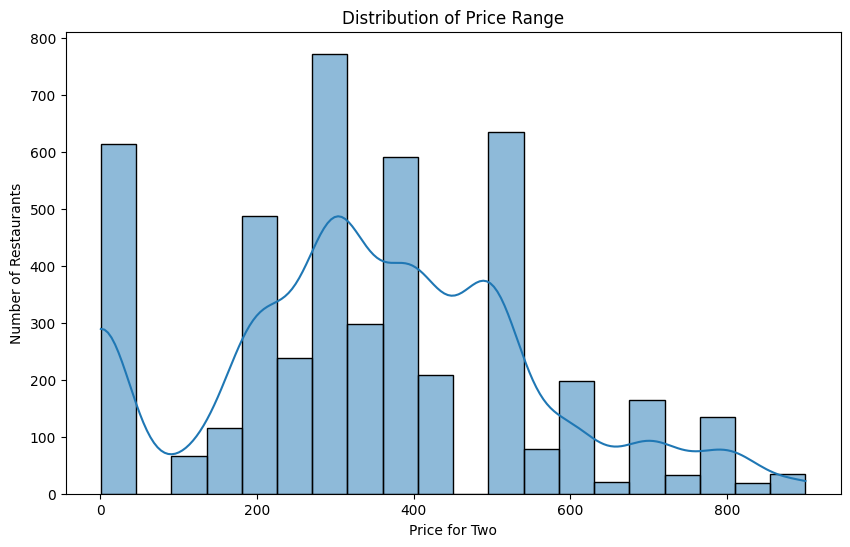

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_For_Two'], bins=20, kde=True)
plt.xlabel('Price for Two')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Range')
plt.show()

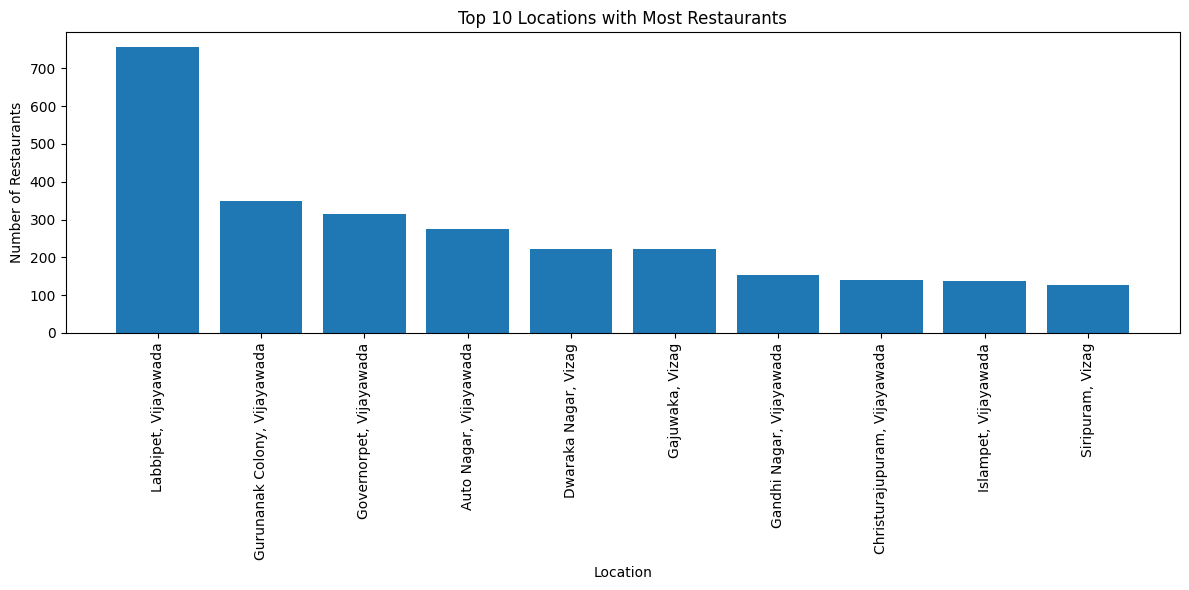

In [37]:
location_counts = df['Location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(location_counts.index, location_counts.values)
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Locations with Most Restaurants')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [38]:
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].mean()).round(0).astype(int)

In [39]:
df = df.dropna(subset=['Ratings'])
df['Ratings'] = df['Ratings'].round(0).astype(int)


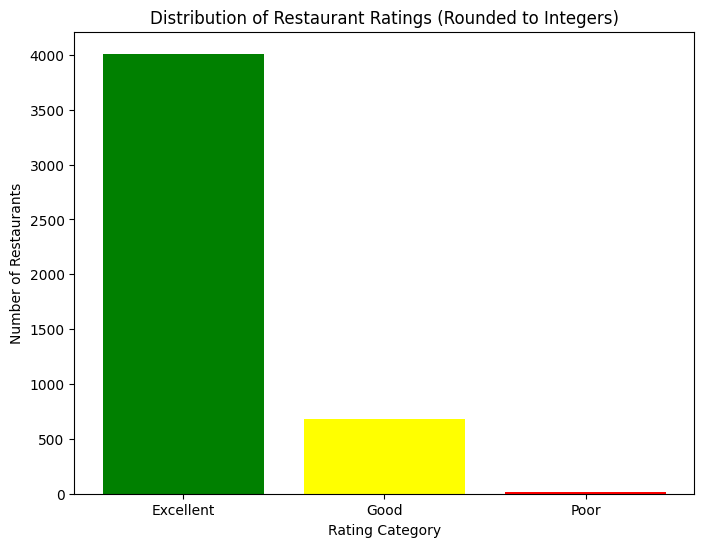

In [40]:
df['Ratings'] = df['Ratings'].round(0).astype(int)

def categorize_rating(rating):
    if rating >= 4:
        return 'Excellent'
    elif rating >= 3:
        return 'Good'
    else:
        return 'Poor'

df['rating_category'] = df['Ratings'].apply(categorize_rating)

rating_counts = df['rating_category'].value_counts()

colors = {'Excellent': 'green', 'Good': 'yellow', 'Poor': 'red'}

plt.figure(figsize=(8, 6))
plt.bar(
    rating_counts.index,
    rating_counts.values,
    color=[colors[category] for category in rating_counts.index]
)
plt.xlabel('Rating Category')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurant Ratings (Rounded to Integers)')
plt.show()

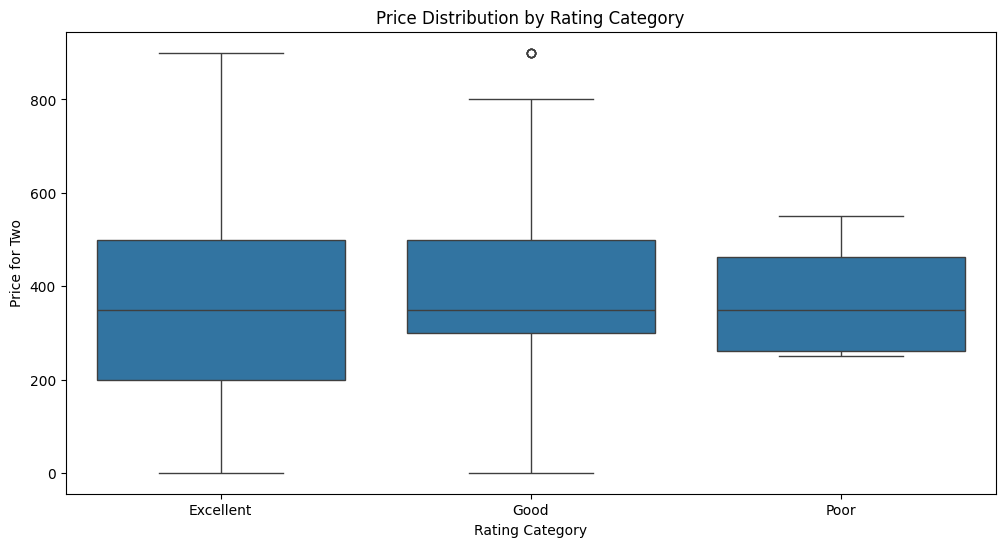

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating_category', y='Price_For_Two', data=df)
plt.xlabel('Rating Category')
plt.ylabel('Price for Two')
plt.title('Price Distribution by Rating Category')
plt.show()

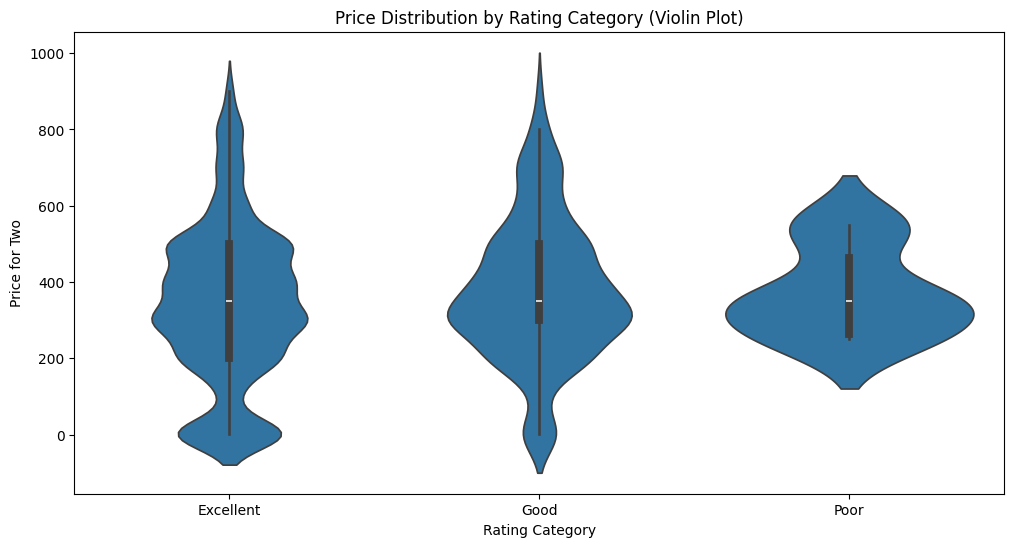

In [42]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='rating_category', y='Price_For_Two', data=df)
plt.xlabel('Rating Category')
plt.ylabel('Price for Two')
plt.title('Price Distribution by Rating Category (Violin Plot)')
plt.show()

C:\Users\Nithin\AppData\Roaming\Python\Python310\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Pickle files not found. Generating TF-IDF vectorizer and matrix...
Error fetching geocode for : 0
Could not find coordinates for the given address.
